# 12752  Course Project
## Xiyu Wang

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

### 1. Preprocessing Data
#### 1.1 Load Data
Import dataset from RECS. And select data for heating consumption, number of heated rooms, heated areas, built year of the building, and the region of the buildings.

In [97]:
oringinalData= pd.DataFrame.from_csv('../../assignment/project/recs2009_public.csv')
energyConsump = oringinalData
energyConsump = oringinalData[['REGIONC','YEARMADE','TOTHSQFT','HEATROOM']]
energyConsump['Heating']= oringinalData['TOTALBTUSPH']
energyConsump['HeatArea']= energyConsump['TOTHSQFT']
energyConsump = energyConsump.drop(energyConsump.columns[[2]],axis=1)
energyConsump.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REGIONC  YEARMADE  HEATROOM  Heating  HeatArea
DOEID                                                
1.0          2    2004.0       9.0  10873.0    3958.0
2.0          4    1998.0       4.0  38606.0    2736.0
3.0          1    1965.0       2.0  40248.0     528.0
4.0          2    1985.0       7.0  40196.0    1623.0
5.0          1    1983.0       5.0  36136.0    1274.0

#### 1.2 Clean Data
Since the region code from 1-4 means northesat, midwest, south and west. Region codes larger than 4 are considered as outliers, thus should be deleted.
Also, the heating consumption may contain errors or is simply not applicable, namely, heating consumption equalls to 0, and should be delected. 

In [98]:
energyConsump = energyConsump[energyConsump.REGIONC<5]
energyConsump = energyConsump[energyConsump.Heating != 0]
energyConsump.shape

(11534, 5)

#### 1.3 Explore the Data
I first classify the data by its region code, and then plot see the relationship between the heating consumption and the built year ('YEARMADE' column). The result of this relationship is shown in the following figure.

In [99]:
northEast = energyConsump[energyConsump.REGIONC==1]
northEast= northEast.drop(northEast.columns[[0,2,4]],axis=1)
midWest = energyConsump[energyConsump.REGIONC==2]
midWest= midWest.drop(midWest.columns[[0,2,4]],axis=1)
south = energyConsump[energyConsump.REGIONC==3]
south = south.drop(south.columns[[0,2,4]],axis=1)
west = energyConsump[energyConsump.REGIONC==4]
west = west.drop(west.columns[[0,2,4]],axis=1)
west.head()

YEARMADE  Heating
DOEID                   
2.0      1998.0  38606.0
11.0     1950.0  20773.0
15.0     1985.0  34182.0
19.0     1992.0  45359.0
21.0     1958.0  25070.0

In [100]:
t1 = northEast['YEARMADE']
s1 = northEast['Heating']

t2 = midWest['YEARMADE']
s2 = midWest['Heating']

t3 = south['YEARMADE']
s3 = south['Heating']

t4 = west['YEARMADE']
s4 = west['Heating']

plt.figure()
plt.figure(figsize=(8,5))
plt.scatter(t1, s1,c='g',marker='o', s=1.5, alpha=.5, edgecolors='face',label='NorthEast')
plt.scatter(t2, s2,c='r',marker='o', s=1.5, alpha=.5, edgecolors='face',label='MidWest')
plt.scatter(t3, s3,c='b',marker='o', s=1.5, alpha=.5, edgecolors='face',label='South')
plt.scatter(t4, s4,c='y',marker='o', s=1.5, alpha=.5, edgecolors='face',label='West')
plt.xlabel('Year Built')
plt.ylabel('Heating Consumption')
plt.ylim(-50000,400000)
plt.legend(fontsize = 'small',bbox_to_anchor=(0.95, 1))
plt.show()

The relationship between heating consumption is not very much clear. But it can be inferred from the figure that there are several spikes when the building was built in 1920, 1930, 1940, 1950... To have a much clear relationship between these regions, stem plots can be applied.

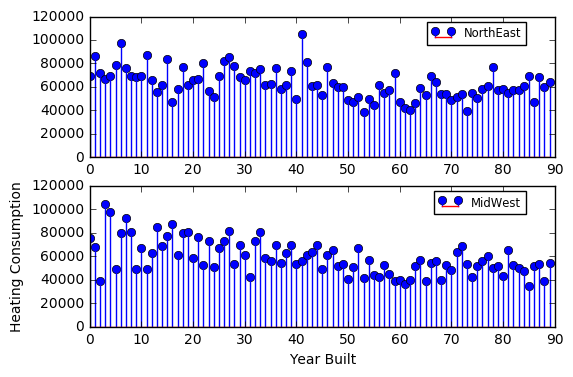

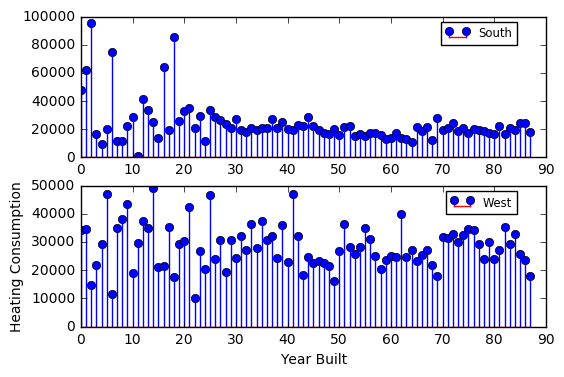

In [101]:
northEastYearmean=northEast.groupby(northEast['YEARMADE']).mean()
midWestYearmean=midWest.groupby(midWest['YEARMADE']).mean()
southYearmean=south.groupby(south['YEARMADE']).mean()
westYearmean=west.groupby(west['YEARMADE']).mean()

plt.figure(1)
plt.subplot(211)
plt.stem(northEastYearmean,label='NorthEast')
plt.legend(fontsize = 'small',bbox_to_anchor=(0.95, 1))
plt.subplot(212)
plt.stem(midWestYearmean,label='MidWest')
plt.legend(fontsize = 'small',bbox_to_anchor=(0.95, 1))
plt.xlabel('Year Built')
plt.ylabel('Heating Consumption')

plt.figure(2)
plt.subplot(211)
plt.stem(southYearmean,label='South')
plt.legend(fontsize = 'small',bbox_to_anchor=(0.95, 1))
plt.subplot(212)
plt.stem(westYearmean,label='West')
plt.legend(fontsize = 'small',bbox_to_anchor=(0.95, 1))
plt.xlabel('Year Built')
plt.ylabel('Heating Consumption')

plt.show()

Despite of several outliers, it is clear that the heating consumption of South is much smaller in amplitude compared with other regions, which is in accordance with our common sense.

### 2. Relationship among Region, Yearly Heating Consumption, Heating Area, and Number of Heated Rooms
#### 2.1 Select Data
In this section, the Heating Consumption is corresponding to the 'Heating' conlumn, Heated Area corresponding to 'HeatArea'column, and Number of Heated Rooms to 'HEATROOM' column.

In [102]:
reHeating=pd.DataFrame(energyConsump,columns=['Heating','HEATROOM','REGIONC','HeatArea'])
x=reHeating[['HEATROOM','REGIONC','HeatArea']]
y=reHeating[['Heating']]
x.tail()

HEATROOM  REGIONC  HeatArea
DOEID                               
12079.0       5.0        2     893.0
12080.0       1.0        3     502.0
12081.0       8.0        2    4181.0
12082.0       5.0        4     864.0
12083.0       4.0        4    4520.0

#### 2.2 Regression Model
Use a decision tree model to the data, and get the score of this regression. Restrict the depth of the regression since the Heated Area is discrete.

In [103]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=8)  
reg.fit(x,y)
print(reg.score(x,y))

0.44302451033


The result is not quite satisfactory. The relationship is not very clear. The score cannot directly tell the regression result, so I plot a 3D figure as below.

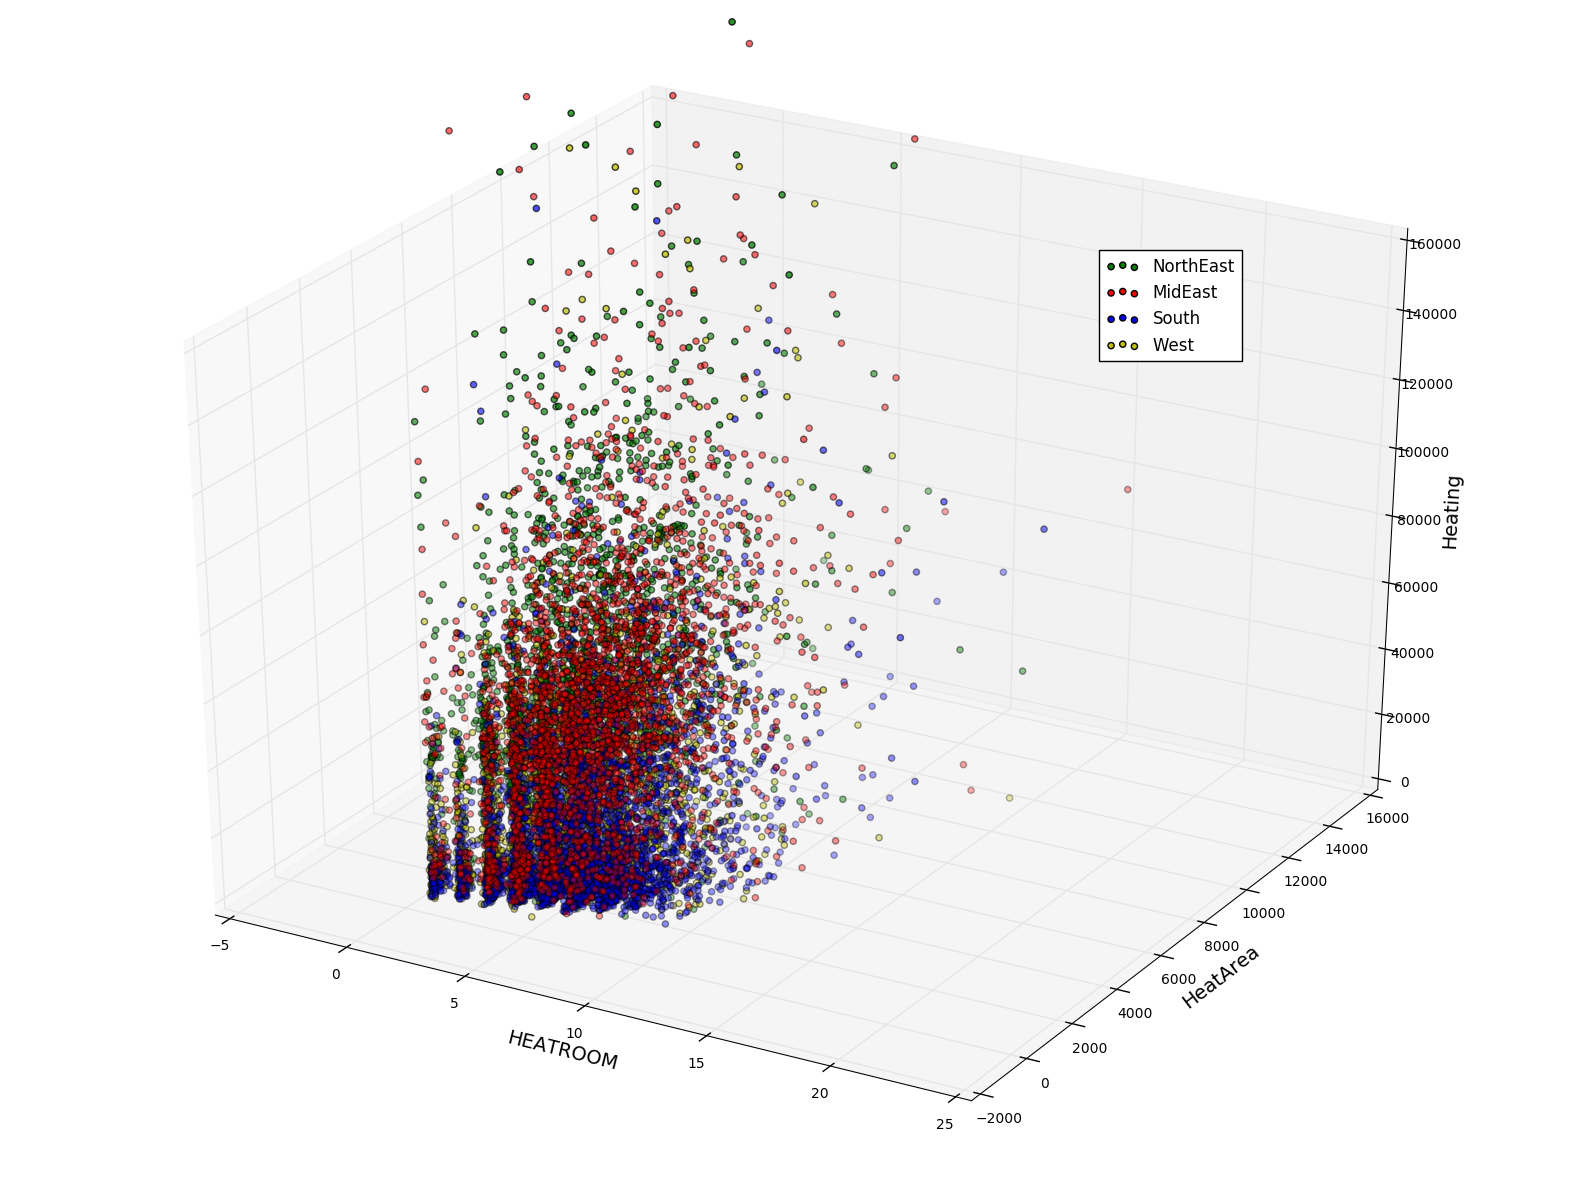

In [104]:
from mpl_toolkits.mplot3d import axes3d

reHeating1=reHeating[reHeating['REGIONC']==1]
reHeating2=reHeating[reHeating['REGIONC']==2]
reHeating3=reHeating[reHeating['REGIONC']==3]
reHeating4=reHeating[reHeating['REGIONC']==4]
X1 = reHeating1['HEATROOM']
Y1 = reHeating1['HeatArea']
Z1 = reHeating1['Heating']

X2 = reHeating2['HEATROOM']
Y2 = reHeating2['HeatArea']
Z2 = reHeating2['Heating']

X3 = reHeating3['HEATROOM']
Y3 = reHeating3['HeatArea']
Z3 = reHeating3['Heating']

X4 = reHeating4['HEATROOM']
Y4 = reHeating4['HeatArea']
Z4 = reHeating4['Heating']


fig= plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, Y1, Z1,c='g',label='NorthEast')
ax.scatter(X2, Y2, Z2,c='r',label='MidEast')
ax.scatter(X3, Y3, Z3,c='b',label='South')
ax.scatter(X4, Y4, Z4,c='y',label='West')
ax.set_zlim3d(0,160000)
ax.set_xlabel('HEATROOM',fontsize=14)
ax.set_ylabel('HeatArea',fontsize=14)
ax.set_zlabel('Heating',fontsize=14)
plt.legend(bbox_to_anchor=(0.8, 0.8))
plt.show() 

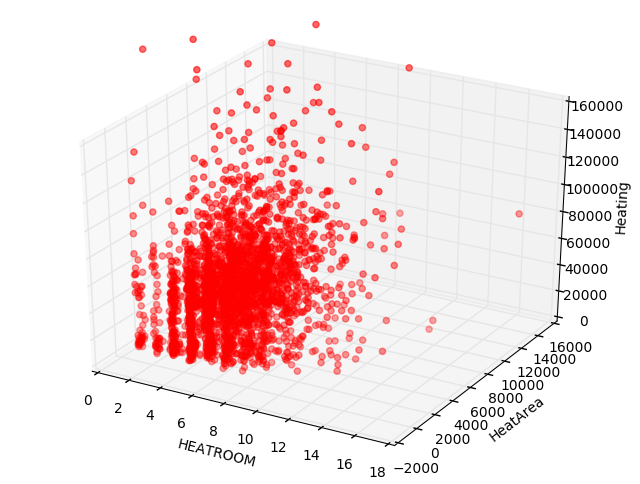

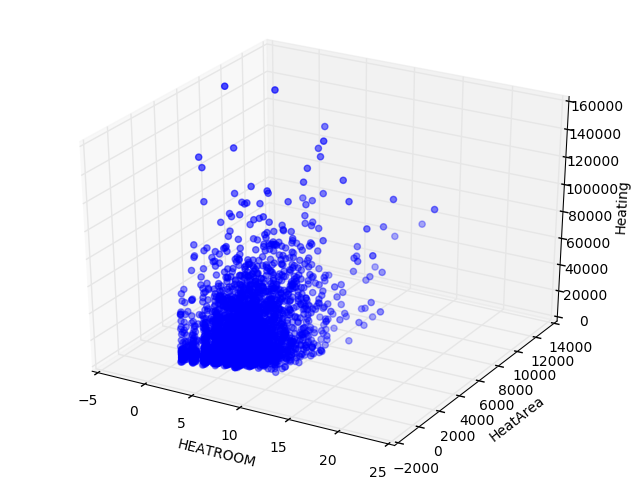

In [105]:
for c, Xs, Ys, Zs in [('g', X1, Y1, Z1), ('r', X2, Y2, Z2),('b',X3,Y3,Z3),('y',X4,Y4,Z4)]:
    fig= plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d') 
    ax.scatter(Xs, Ys, Zs,color=c)
    ax.set_zlim3d(0,160000)
    ax.set_xlabel('HEATROOM')
    ax.set_ylabel('HeatArea')
    ax.set_zlabel('Heating')
plt.show() 

The result is not the same as I expected. What I expected was that there should be stronger correlation between number of heated rooms, and heating consumption than the regression shows.
However, the following presents another way to look into the question. What I also expect was when the number of heated rooms increases, heating consumption is also increasing, but when that number reaches a certain threshold, the increase in the heating consumption will become very slow, and that the consumption might remain at the same level. This phenomenon may due to convection, radiation and many other factors. Then for buildings in a particular region, optimized number of heated room may exist. This preliminary thought could be indicated from the following boxplot.

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


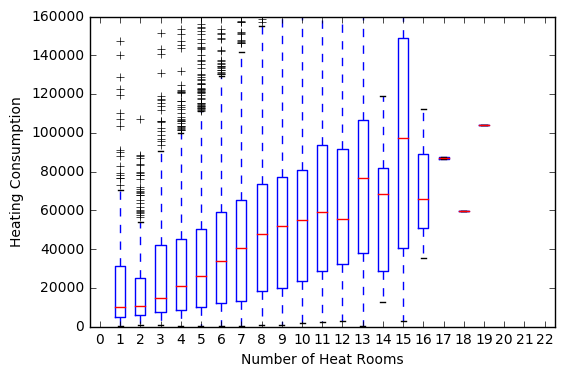

In [106]:
boxbox = pd.DataFrame()
for i in range(int(reHeating['HEATROOM'].max())):
    A = reHeating[reHeating['HEATROOM'] == i]
    A.index = np.arange(0,len(A))
    eachRoom = pd.DataFrame(A['Heating'])
    eachRoom.columns = [str(i)]
    boxbox = pd.concat([boxbox, eachRoom], axis=1)
boxbox.plot(kind='box', ylim=[0,160000])
plt.xlabel('Number of Heat Rooms')
plt.ylabel('Heating Consumption')
plt.show()

As the number of heat rooms reaches 8, the pace of the increase in heating consumption becomes very slow. The yearly consumptions of 9 rooms, 10 rooms, and possibly 12 rooms are almost the same. So, building a 10-room household instead of an 11- room one for instance, is not very economic as we thought might be. 

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


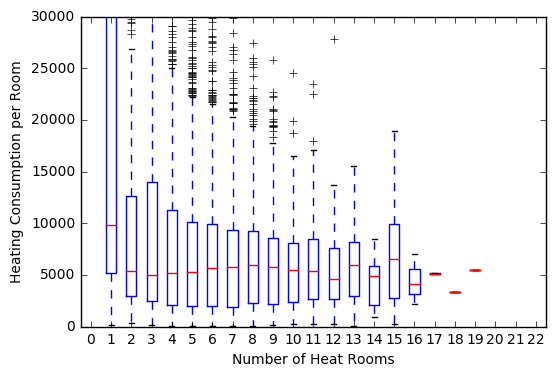

In [107]:
boxbox1 = pd.DataFrame()
for i in range(int(reHeating['HEATROOM'].max())):
    A1 = reHeating[reHeating['HEATROOM'] == i]
    A1.index = np.arange(0,len(A1))
    eachRoom1 = pd.DataFrame(A1['Heating']/i)
    eachRoom1.columns = [str(i)]
    boxbox1 = pd.concat([boxbox1, eachRoom1], axis=1)
boxbox1.plot(kind='box', ylim=[0,30000])
plt.xlabel('Number of Heat Rooms')
plt.ylabel('Heating Consumption per Room')
plt.show()


The heating consumption per room is shown above. It can be inferred that building with only one room is least favourable, since it suffers the highest consumption rate. The rate drops when the room number is 2-3. And it increases from 3-8, then drops considerably from 8 to 12, and then remains almost the same at 14, and 16. So the optimized heat room number might be somewhere around 3 and 12, specially 3 for small households, and 12 for large apartments.

Due to the small amount of data in this dataset, the result is also not very stable. Outliers exist, which intervenes my judgement about the result. Also, the small amount of data prevents me from conducting analysis according to the region code, otherwise in some cases, I will have less than 10 data in a particular region about a particular heated room number.

### 3. Relationship among Region, Yearly Heating Consumption, Heating Area, and Built Year of the buildings
#### 3.1 Select Data

In [108]:
relationHeating=pd.DataFrame(energyConsump,columns=['Heating','YEARMADE','HeatArea','REGIONC'])
relationHeating.head()

Heating  YEARMADE  HeatArea  REGIONC
DOEID                                      
1.0    10873.0    2004.0    3958.0        2
2.0    38606.0    1998.0    2736.0        4
3.0    40248.0    1965.0     528.0        1
4.0    40196.0    1985.0    1623.0        2
5.0    36136.0    1983.0    1274.0        1

In [109]:
xA=relationHeating[['YEARMADE','REGIONC','HeatArea']]
yA=relationHeating[['Heating']]
xA.tail()

YEARMADE  REGIONC  HeatArea
DOEID                               
12079.0    1985.0        2     893.0
12080.0    1980.0        3     502.0
12081.0    1993.0        2    4181.0
12082.0    1930.0        4     864.0
12083.0    1948.0        4    4520.0

#### 3.2 Regression Model
Use a decision tree model to the data, and get the score of this regression. Restrict the depth of the regression since the HeatArea is discrete.

In [110]:
from sklearn import tree
regA = tree.DecisionTreeRegressor(max_depth=8)  
regA.fit(xA,yA)
print(regA.score(xA,yA))

0.473263110371


In [111]:
from sklearn import  cross_validation,grid_search

param_grid = {'max_depth': np.arange(2, 10)}
reg1 = grid_search.GridSearchCV(tree.DecisionTreeRegressor(), param_grid)
tree_preds = reg1.fit(xA, yA)
kf_total = cross_validation.KFold(len(xA), n_folds=10, shuffle=True, random_state=4)
tree_performance=cross_validation.cross_val_score(tree_preds,xA,yA,cv=kf_total, n_jobs = 1).mean()
print(reg1.best_params_,reg1.best_score_)

{'max_depth': 5} 0.36437407743741107


In [112]:
reg2 = tree.DecisionTreeRegressor(max_depth=5)  
reg2.fit(xA,yA)
print(reg2.score(xA,yA))

0.404031984519


#### 3.3 Prediction
Since the detailed information of a building, more specifically, its built year, area, and the region it stands, is often easy to access. It can be applied to predict the heating consumption of a particular building. So in this case, I create a dataframe with all the combinations of possible region codes, heated areas and built years, and store each combination in a row. I then use the above regression model to predict the consumption of each row.

In [113]:
setA =  np.arange(1920,2010,5)
setB=np.arange(1,5)
setC=np.arange(100,14000,300)
import itertools
iterables = [ setA, setB, setC ]
datasetA=[]
for t in itertools.product(*iterables):
    datasetA.append(t)
datasetB= pd.DataFrame(datasetA,columns=['YEARMADE','REGIONC','HeatArea'])
datasetB.tail()

YEARMADE  REGIONC  HeatArea
3379      2005        4     12700
3380      2005        4     13000
3381      2005        4     13300
3382      2005        4     13600
3383      2005        4     13900

In [114]:
yB=reg2.predict(datasetB)
predictionB = pd.DataFrame(yB,columns=['Heating'])
predictionB.tail()

Heating
3379  42045.0
3380  42045.0
3381  42045.0
3382  42045.0
3383  42045.0

In [115]:
resultPred = pd.merge(datasetB,predictionB,right_index=True, left_index=True)
resultPred.tail()

YEARMADE  REGIONC  HeatArea  Heating
3379      2005        4     12700  42045.0
3380      2005        4     13000  42045.0
3381      2005        4     13300  42045.0
3382      2005        4     13600  42045.0
3383      2005        4     13900  42045.0

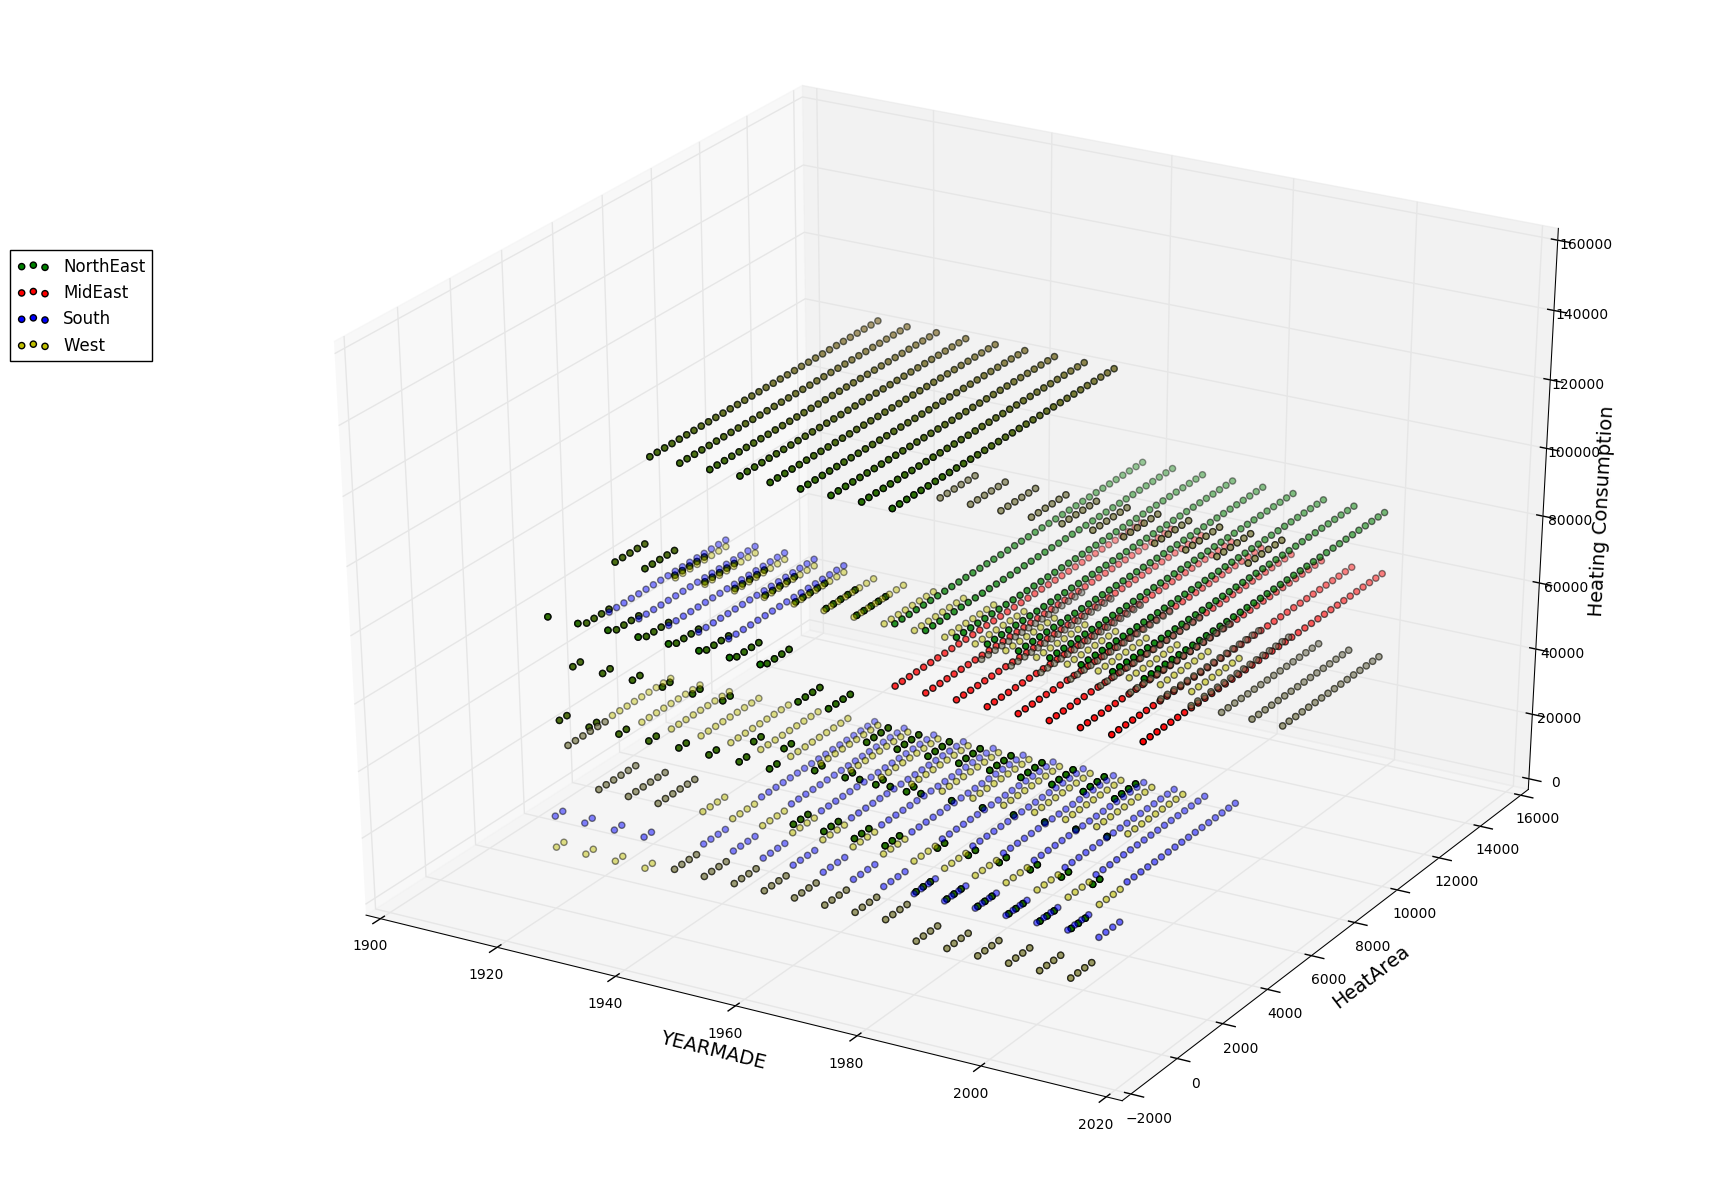

In [116]:
from mpl_toolkits.mplot3d import Axes3D

resultPred1=resultPred[resultPred['REGIONC']==1]
resultPred2=resultPred[resultPred['REGIONC']==2]
resultPred3=resultPred[resultPred['REGIONC']==3]
resultPred4=resultPred[resultPred['REGIONC']==4]
XB1 = resultPred1['YEARMADE']
YB1 = resultPred1['HeatArea']
ZB1 = resultPred1['Heating']

XB2 = resultPred2['YEARMADE']
YB2 = resultPred2['HeatArea']
ZB2 = resultPred2['Heating']

XB3 = resultPred3['YEARMADE']
YB3 = resultPred3['HeatArea']
ZB3 = resultPred3['Heating']

XB4 = resultPred4['YEARMADE']
YB4 = resultPred4['HeatArea']
ZB4 = resultPred4['Heating']


fig1 = plt.figure(figsize=(20,15))
axB = fig1.add_subplot(111, projection='3d')
axB.scatter(XB1, YB1, ZB1,c='g',label='NorthEast')
axB.scatter(XB2, YB2, ZB2,c='r',label='MidEast')
axB.scatter(XB3, YB3, ZB3,c='b',label='South')
axB.scatter(XB4, YB4, ZB4,c='y',label='West')
axB.set_zlim3d(0,160000)
axB.set_xlabel('YEARMADE',fontsize=14)
axB.set_ylabel('HeatArea',fontsize=14)
axB.set_zlabel('Heating Consumption',fontsize=14)
plt.legend(bbox_to_anchor=(0, 0.8))
plt.show() 

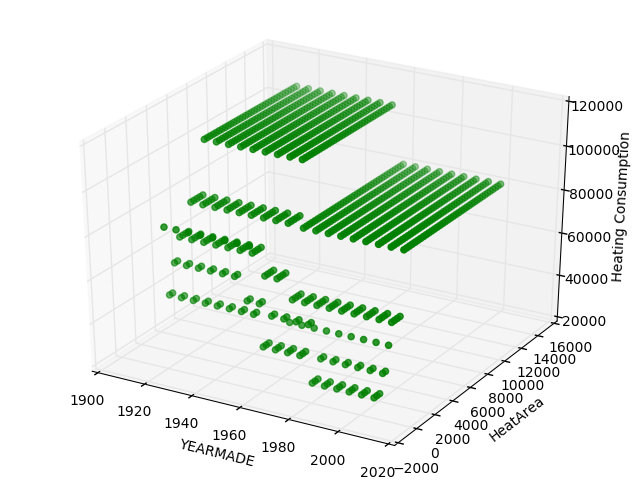

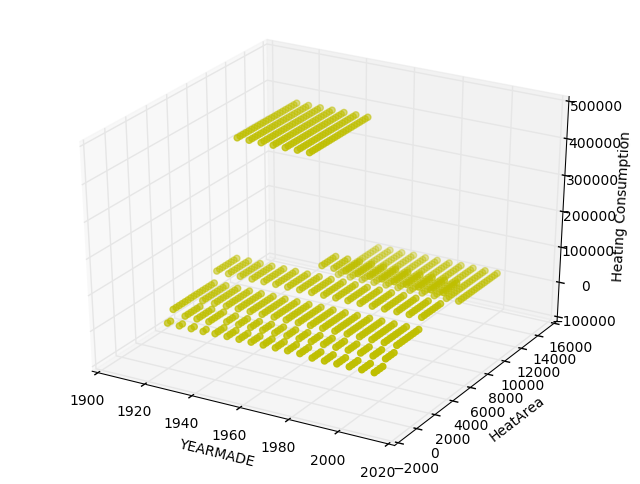

In [117]:
for c, Xs, Ys, Zs in [('g', XB1, YB1, ZB1), ('r', XB2, YB2, ZB2),('b',XB3,YB3,ZB3),('y',XB4,YB4,ZB4)]:
    fig= plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d') 
    ax.scatter(Xs, Ys, Zs,color=c)
#     ax.set_zlim3d(0,160000)
    ax.set_xlabel('YEARMADE')
    ax.set_ylabel('HeatArea')
    ax.set_zlabel('Heating Consumption')
plt.show() 

Some interesting facts concerning this prediction are that:
(1). Heating consumption increases as heated area increases. The reason why this relationship is discrete is that I created discrete areas with a gap of 300, rather than making it continuous. 
(2). And there is a gap between houses built before 1960, and after 1960. It is obvious that houses built after 1960 are much more energy-saving. And it is a nationwide tendency.